In [1]:
import olac
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

# Popping clusters 
In this notebook is an example shown of clusters popping up randomly in time.

### Why is this needed?
Types of fraud or other types of data that has characteristics that change over time due to trends and sentiments, will pop-up in random clusters in their feature space. This popping cluster toy problem translates this changing clusters to a 2D problem. Cluster of a random size will appear in the x,y plane.

### functionalities
The popping up clusters are generated in the python module popping_clusters.  
**Input Parameters:**
- n_clusters; number of clusters that will appear in the simulation
- n_points; the number of points that will be simulated
- slider; either poisson or sinus
- cluster width; determines the width of the clusters. The widths are chose from a random gaussian with a mean at cluster_width
- amount_of_label; how many different labels do we want to give the data

#### slider
The slider is an important part in the simulation. The slider is actually a pdf that transforms over time. This will distribute the chances of a point occuring by a certain cluster over time. Currently are two types of sliders implemented: **poisson and sinus**.  
The **poisson slider** is the most intuitive. The mean of the poisson will slide linearly over time such that the chance of the first cluster occuring will decrease and the last cluster occuring will increase untill it completely fades out.  
The **sinus slider** works a bit different. All the probabilities of a cluster occuring are distributed by  
$P(C) = \sum_i\sin(\frac{\pi}{n_{clusters}}\cdot(t + c_i))^2$  
Which is then normalized so that all probabilities add up to 1. 

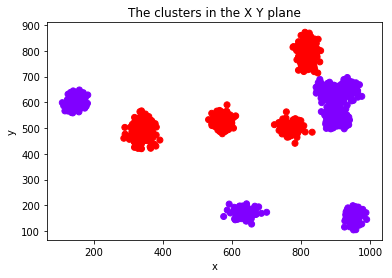

In [2]:
generator = olac.data_generators.cluster_generator(n_clusters=10, n_points=2000, cluster_width=20 )
output = list(generator)
df_tmp = pd.DataFrame(output, columns=['x', 'y', 'label'])
plt.scatter(df_tmp.x, df_tmp.y, c=df_tmp.label, cmap='rainbow')
plt.xlabel('x')
plt.ylabel('y')
plt.title('The clusters in the X Y plane')
plt.show()

## And now over time
Below is an played version over time of the clusters occuring

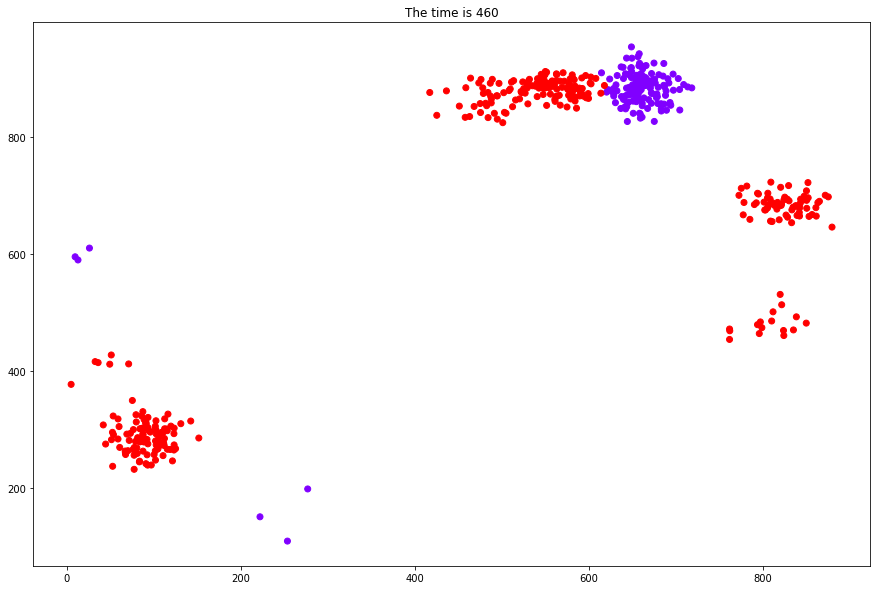

KeyboardInterrupt: 

In [21]:
for i in range(len(df_tmp)):
    plt.figure(figsize=(15,10))
    df_tmp1 = df_tmp.iloc[0:i]
    plt.scatter(df_tmp1.x, df_tmp1.y, c=df_tmp1.label, cmap='rainbow')
    #plt.xlim(0,1005)
    #plt.ylim(0,1005)
    plt.title('The time is %i'%i)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    #time.sleep(0.001)
    plt.close()